<a href="https://colab.research.google.com/github/Shivam4681/Restaurant-Review-Sentiment-Analysis-/blob/main/Restaurant_Review_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sentiment Analysis with Keras**

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')


Step 1: Read the dataset

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Shivam4681/Sentiment-Analysis-with-Keras-ANN/main/Restaurant_Reviews.tsv'
df = pd.read_csv(url, sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
s = "Welcome, To Deep Learning Class!"

In [4]:
s.lower()

'welcome, to deep learning class!'

In [5]:
import re
s1 = re.sub("[^a-z ]", "", s)
s1

'elcome o eep earning lass'

**Create a function to preprocess text**



In [6]:
def preprocessing_text(s):
  s = s.lower()
  s = re.sub('[^a-z ]', '', s)
  return s

In [7]:
a = 'Wow...., The Experience Was Good'
preprocessing_text(a)

'wow the experience was good'

**Apply preprocessing on dataframe**

In [8]:
df['Review_pre'] = df['Review'].apply(preprocessing_text)
df

,Review,Liked,Review_pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


**Apply TFIDF Vectorizer**

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_pre = tfidf.fit_transform(df['Review_pre']).toarray()

In [10]:
x_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
x_pre.shape

(1000, 2046)

In [12]:
y = df['Liked']
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64


**Apply Train test split**

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pre, y, test_size=0.2, random_state=21)

In [14]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27867055, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
y_train

108    1
134    1
585    1
42     0
990    0
      ..
48     1
772    0
824    0
207    0
969    0
Name: Liked, Length: 800, dtype: int64

In [16]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
y_test

492    0
383    0
856    1
834    1
603    1
      ..
72     0
400    0
813    0
195    1
45     1
Name: Liked, Length: 200, dtype: int64

In [18]:
x_train.shape

(800, 2046)

In [19]:
x_test.shape

(200, 2046)

**Build The Neural Network**

In [20]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Dense
from keras.callbacks import EarlyStopping

In [21]:
model = Sequential()

# Input Layer
model.add(Input(shape=(x_train.shape[1],)))

# Hidden Layer 1
model.add(Dense(256, activation='relu'))
# Dropout Layer 1
model.add(Dropout(0.5))

# Hidden layer 2
model.add(Dense(128, activation='relu'))
#Dropout Layer 2
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               524032    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 557057 (2.13 MB)
Trainable params: 557057 (2.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
es = EarlyStopping(patience=10)

In [25]:
hist = model.fit(x_train, y_train, validation_split=0.2, batch_size=16, epochs=100, callbacks=[es])

Epoch 1/100
40/40 [==============================] - 2s 18ms/step - loss: 0.6920 - accuracy: 0.5156 - val_loss: 0.6882 - val_accuracy: 0.5250
Epoch 2/100
40/40 [==============================] - 1s 16ms/step - loss: 0.6610 - accuracy: 0.7328 - val_loss: 0.6495 - val_accuracy: 0.7437
Epoch 3/100
40/40 [==============================] - 0s 10ms/step - loss: 0.5076 - accuracy: 0.8891 - val_loss: 0.5092 - val_accuracy: 0.7937
Epoch 4/100
40/40 [==============================] - 0s 12ms/step - loss: 0.2478 - accuracy: 0.9438 - val_loss: 0.4268 - val_accuracy: 0.8313
Epoch 5/100
40/40 [==============================] - 0s 11ms/step - loss: 0.0963 - accuracy: 0.9828 - val_loss: 0.4450 - val_accuracy: 0.8062
Epoch 6/100
40/40 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.9953 - val_loss: 0.4769 - val_accuracy: 0.7875
Epoch 7/100
40/40 [==============================] - 0s 10ms/step - loss: 0.0221 - accuracy: 0.9953 - val_loss: 0.5318 - val_accuracy: 0.7937
Epoch 

**Learning curve**

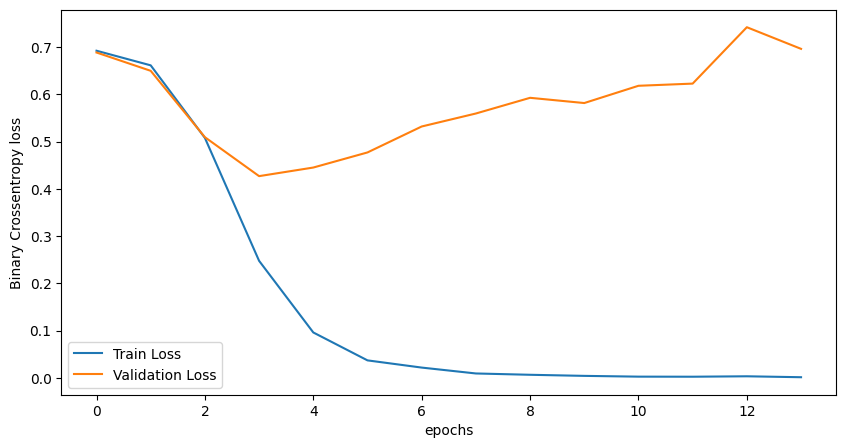

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Binary Crossentropy loss')
plt.legend()
plt.show()

**Evaluate the model**

In [27]:
model.evaluate(x_train, y_train)

25/25 [==============================] - 0s 5ms/step - loss: 0.1396 - accuracy: 0.9550


[0.1396295726299286, 0.9549999833106995]

In [28]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.5484 - accuracy: 0.8050


[0.5484118461608887, 0.8050000071525574]

**Predict results for train and test**

In [29]:
yprob_train = model.predict(x_train)
yprob_test = model.predict(x_test)

7/7 [==============================] - 0s 5ms/step


In [30]:
yprob_train[0:5]

array([[9.9856883e-01],
       [9.9995428e-01],
       [9.9999917e-01],
       [2.7137565e-05],
       [9.6374613e-05]], dtype=float32)

In [31]:
ypred_train = [1 if prob>0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>0.5 else 0 for prob in yprob_test]

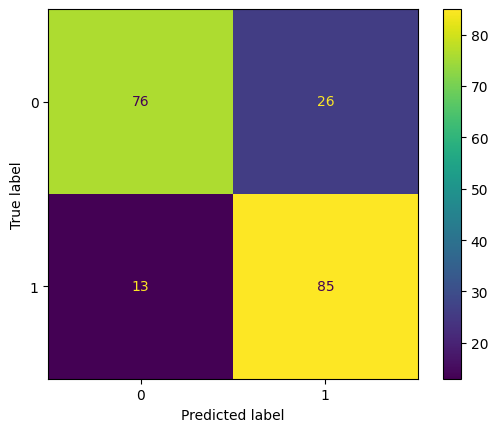

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, ypred_test)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       102
           1       0.77      0.87      0.81        98

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



**Save the model for future use**

In [34]:
model.save('SentmentModel.keras')